1. Cities in Sweden - create dataset (*)  
Create this DataFrame from scratch:  

Kommun	Population  
0	Malmö	347949  
1	Stockholm	975551  
2	Uppsala	233839  
3	Göteborg	583056  


  a) Use your DataFrame to print out all the cities. (*)

  b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

  c) Sort the cities by population from largest to smallest. (*)

  d) Filter out the three largest cities. (*)

  e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city.

In [452]:
import pandas as pd

data_dict = {'Kommun':['Malmö', 'Stockholm', 'Uppsala', 'Göteborg'], 'Population': [347949, 975551, 233839, 583056]}
df_city_pop = pd.DataFrame(data=data_dict)
df_city_pop

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [453]:
# a) Use your DataFrame to print out all the cities
print(", ".join(df_city_pop["Kommun"]))

Malmö, Stockholm, Uppsala, Göteborg


In [454]:
df_city_pop["Kommun"] == "Göteborg" # returns true for row matching value of "Göteborg" in column "Kommun" - Use this in next cell:

0    False
1    False
2    False
3     True
Name: Kommun, dtype: bool

In [455]:
# b) Select only the row which contains Göteborg. Do this by using the name Göteborg
df_city_pop[df_city_pop["Kommun"] == "Göteborg"] # to get values of the entire row

,Kommun,Population
3,Göteborg,583056


In [456]:
# c) Sort the cities by population from largest to smallest
df_city_pop_sorted = df_city_pop.sort_values(by = "Population", ascending = False)

In [457]:
# d) Filter out the three largest cities
df_city_pop_sorted.tail(-3)

,Kommun,Population
2,Uppsala,233839


In [458]:
# e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%).
# This column should be filled with percentage of the Swedish population for each city

df_city_pop_sorted["Population (%)"] = ((df_city_pop["Population"] / 10379295)*100).round(2)
df_city_pop_sorted

,Kommun,Population,Population (%)
1,Stockholm,975551,9.40
3,Göteborg,583056,5.62
0,Malmö,347949,3.35
2,Uppsala,233839,2.25


---

## 2. Cities in Sweden - real dataset (*)

Go into [this page][scb_pop50], scroll down and download the Excel file containing Swedish population dataset from SCB.

[scb_pop50]: https://www.scb.se/hitta-statistik/statistik-efter-amne/befolkning/befolkningens-sammansattning/befolkningsstatistik/pong/tabell-och-diagram/topplistor-kommuner/folkmangd-topp-50/

&nbsp; a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

Feel free to do more explorations. (*)

&nbsp; b) Clean your data so that the head looks like this: (*)


|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
|  0 |          83 |          84 | Ale      |            31868 |            31402 |     1.48398  |
|  1 |          64 |          64 | Alingsås |            41602 |            41420 |     0.439401 |
|  2 |         123 |         123 | Alvesta  |            20224 |            20134 |     0.447005 |
|  3 |         255 |         255 | Aneby    |             6821 |             6848 |    -0.394276 |
|  4 |         169 |         167 | Arboga   |            14039 |            14087 |    -0.34074  |

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the five smallest cities. (*)

&nbsp; e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

&nbsp; f) Plot a bar chart for the five largest cities and the five smallest cities. (*) 

---
&nbsp; a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

In [459]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "../Data/komtopp50_2020.xlsx"
df = pd.read_excel(file_path, sheet_name = "Totalt")
df.head(7)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Folkmängd per kommun 31 december 2020 jämfört ...,NaN,NaN,NaN,NaN,NaN
2,Sorterat i alfabetisk ordning. Rangordning frå...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Folkmängd 31 december,NaN,Förändring
5,2020,2019.0,NaN,2020,2019.0,%
6,83,84.0,Ale,31868,31402.0,1.483982


In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    object 
 1   Unnamed: 1  291 non-null    float64
 2   Unnamed: 2  291 non-null    object 
 3   Unnamed: 3  292 non-null    object 
 4   Unnamed: 4  291 non-null    float64
 5   Unnamed: 5  292 non-null    object 
dtypes: float64(2), object(4)
memory usage: 14.0+ KB


In [461]:
df.describe()

,Unnamed: 1,Unnamed: 4
count,291.000000,291.000000
mean,151.934708,35496.934708
std,138.092769,74190.464321
min,1.000000,2019.000000
25%,73.500000,10005.000000
50%,146.000000,15940.000000
75%,218.500000,35649.500000
max,2019.000000,974073.000000


&nbsp; b) Clean your data so that the head looks like this: (*)


|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
|  0 |          83 |          84 | Ale      |            31868 |            31402 |     1.48398  |
|  1 |          64 |          64 | Alingsås |            41602 |            41420 |     0.439401 |
|  2 |         123 |         123 | Alvesta  |            20224 |            20134 |     0.447005 |
|  3 |         255 |         255 | Aneby    |             6821 |             6848 |    -0.394276 |
|  4 |         169 |         167 | Arboga   |            14039 |            14087 |    -0.34074  |


In [462]:
df.head(7)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Folkmängd per kommun 31 december 2020 jämfört ...,NaN,NaN,NaN,NaN,NaN
2,Sorterat i alfabetisk ordning. Rangordning frå...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Folkmängd 31 december,NaN,Förändring
5,2020,2019.0,NaN,2020,2019.0,%
6,83,84.0,Ale,31868,31402.0,1.483982


In [463]:
df = df.rename(columns = {"Unnamed: 0": "Rang2020",
                    "Unnamed: 1": "Rang 2019",
                    "Unnamed: 2": "Kommun",
                    "Unnamed: 3": "Folkmängd 2020",
                    "Unnamed: 4": "Folkmängd 2019",
                    "Unnamed: 5": "Förändring"}) # rename columns using column dict

df = df.drop(df.index[0:6]) # drop all rows from 0-6
df = df.reset_index(drop = True) # reset index count to start from 0, drop old index count
df # use inplace = True to mutate values of original DataFram object, otherwise do df_new = df_old

,Rang2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84.0,Ale,31868,31402.0,1.483982
1,64,64.0,Alingsås,41602,41420.0,0.439401
2,123,123.0,Alvesta,20224,20134.0,0.447005
3,255,255.0,Aneby,6821,6848.0,-0.394276
4,169,167.0,Arboga,14039,14087.0,-0.34074
...,...,...,...,...,...,...
285,54,55.0,Österåker,46644,45574.0,2.34783
286,116,115.0,Östhammar,22251,22250.0,0.004494
287,160,159.0,Östra Göinge,15017,15007.0,0.066636
288,284,284.0,Överkalix,3289,3315.0,-0.784314


&nbsp; c) Sort the cities by population from largest to smallest

In [464]:
df_sorted = df.sort_values("Folkmängd 2020", ascending = False)
df_sorted

,Rang2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1.0,Stockholm,975551,974073.0,0.151734
57,2,2.0,Göteborg,583056,579281.0,0.65167
134,3,3.0,Malmö,347949,344166.0,1.099179
241,4,4.0,Uppsala,233839,230767.0,1.331213
124,5,5.0,Linköping,164616,163051.0,0.959822
...,...,...,...,...,...,...
271,286,286.0,Åsele,2805,2794.0,0.393701
5,287,287.0,Arjeplog,2718,2785.0,-2.405745
29,288,288.0,Dorotea,2498,2551.0,-2.077617
194,289,289.0,Sorsele,2442,2489.0,-1.888309


&nbsp; d) Filter out the five smallest cities

In [465]:
df_sorted_exclude_smallest = df_sorted.head(-5)
df_sorted_exclude_smallest

,Rang2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1.0,Stockholm,975551,974073.0,0.151734
57,2,2.0,Göteborg,583056,579281.0,0.65167
134,3,3.0,Malmö,347949,344166.0,1.099179
241,4,4.0,Uppsala,233839,230767.0,1.331213
124,5,5.0,Linköping,164616,163051.0,0.959822
...,...,...,...,...,...,...
157,281,281.0,Norsjö,3945,3986.0,-1.0286
265,282,282.0,Ydre,3726,3747.0,-0.560448
146,283,283.0,Munkfors,3725,3740.0,-0.40107
288,284,284.0,Överkalix,3289,3315.0,-0.784314


&nbsp; e) Use the DataFrame to calculate Sweden's population in 2019 and 2020

In [466]:
pop2020 = sum(df_sorted["Folkmängd 2020"])
pop2020

10379295

In [467]:
pop2019 = sum(df_sorted["Folkmängd 2019"])
pop2019

10327589.0

&nbsp; f) Plot a bar chart for the five largest cities and the five smallest cities

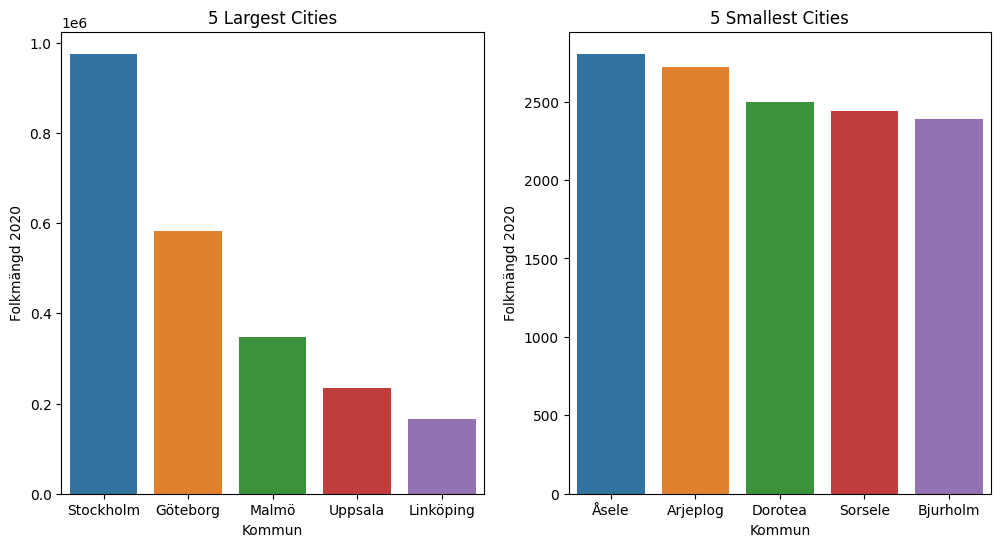

In [468]:
import matplotlib.pyplot as plt

df_largest = df_sorted.head()
df_smallest = df_sorted.tail()

fig, ax = plt.subplots(1,2, figsize = (12, 6))

data_frames = (df_largest, df_smallest)
titles = ("5 Largest Cities", "5 Smallest Cities")
x_columns = ["Kommun", "Kommun"]

for i, (data_frame, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data = data_frame, x = x_columns[i], y = "Folkmängd 2020", ax = ax[i])
    ax[i].set(title = title)